# Predicting Heart Disease with Machine learning

We are going to predict whether or not a patient has heart disease given a set of medical attributes, using the following approach:

1. Problem Definition
2. Data
3. Evaluation
4. Exploration
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical attributes about a patient, can we predict whether or not they have heart disease?

## 2. Data
Data can be found here:<br>
https://archive.ics.uci.edu/ml/datasets/Heart+Disease <br>
https://www.kaggle.com/ronitf/heart-disease-uci

0. age (years)
1. sex (1 = male; 2 = female)
2. chest pain type (4 values)
3. resting blood pressure
4. serum cholestoral in mg/dl
5. fasting blood sugar > 120 mg/dl
6. resting electrocardiographic results (values 0,1,2)
7. maximum heart rate achieved
8. exercise induced angina
9. oldpeak = ST depression induced by exercise relative to rest
10. the slope of the peak exercise ST segment
11. number of major vessels (0-3) colored by flourosopy
12. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
13. target variable (1 = heart disearse; 0 != heart disease)

## 3. Evaluation
> If we can produce a 95% accuracy rate whether or not a patient has heart disease during proof of concept, we can consider pursuing the project

## 4. Exploration


### Preparing the tools

In [122]:
# EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape # rows, cols

(303, 14)

## Data Exploration
Becoming more familiar with the data 
1. What questions should we ask about the data?
2. What data types are we dealing with and how do we treat them?
3. Is there missing data and how do we deal with this?
4. Where are the outliers and should we care about them?
5. How can we add, change, or remove features to get more out of our data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Are there missing data?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

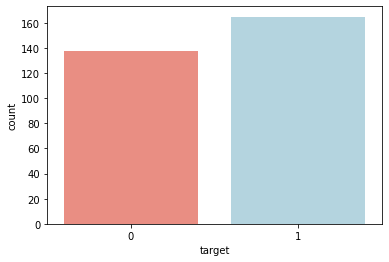

In [7]:
sns.countplot(data=df, x='target', palette=['salmon', 'lightblue']);

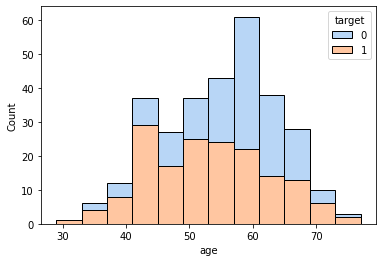

In [8]:
sns.histplot(data=df, 
             multiple="stack",
             x="age",
             palette="pastel", 
             hue="target");

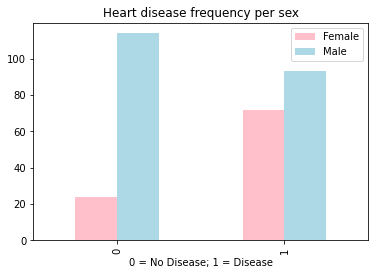

In [9]:
# compare target against patient sex
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   color=['pink','lightblue'])
plt.title("Heart disease frequency per sex")
plt.legend(['Female','Male'])
plt.xlabel("0 = No Disease; 1 = Disease");
# from our dataset, females much more likely to have heart disease

#### Age vs Max heart rate

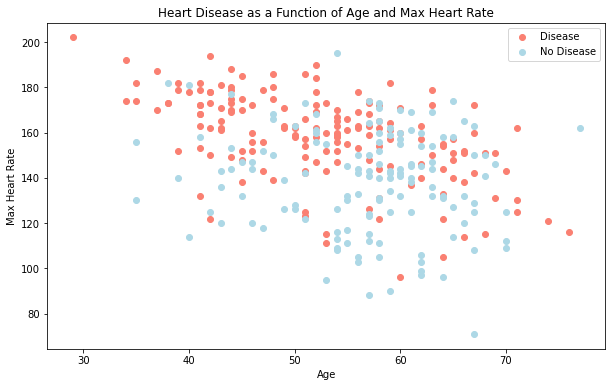

In [10]:
plt.figure(figsize=(10,6))
# positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='salmon')
# negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='lightblue')

# info
plt.title("Heart Disease as a Function of Age and Max Heart Rate")
plt.ylabel("Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"]);

#### Heart disease frequency per chest pain type

In [11]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


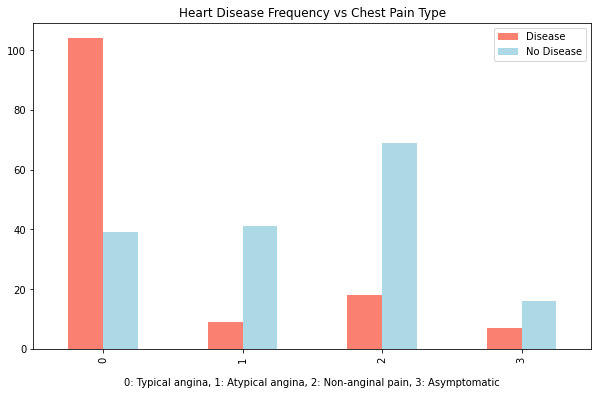

In [12]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue'])
plt.title("Heart Disease Frequency vs Chest Pain Type")
plt.legend(["Disease","No Disease"])
plt.xlabel("\n0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic");

# angina = severe pain in the chest

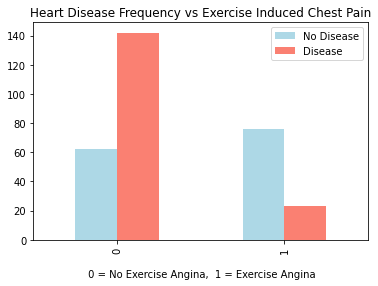

In [13]:
pd.crosstab(df.exang, df.target).plot(kind='bar', color=['lightblue','salmon'])
plt.title("Heart Disease Frequency vs Exercise Induced Chest Pain")
plt.legend(["No Disease", "Disease"])
plt.xlabel("\n 0 = No Exercise Angina,  1 = Exercise Angina");

# Seems here that exercise anginas are less likely to result in heart disease

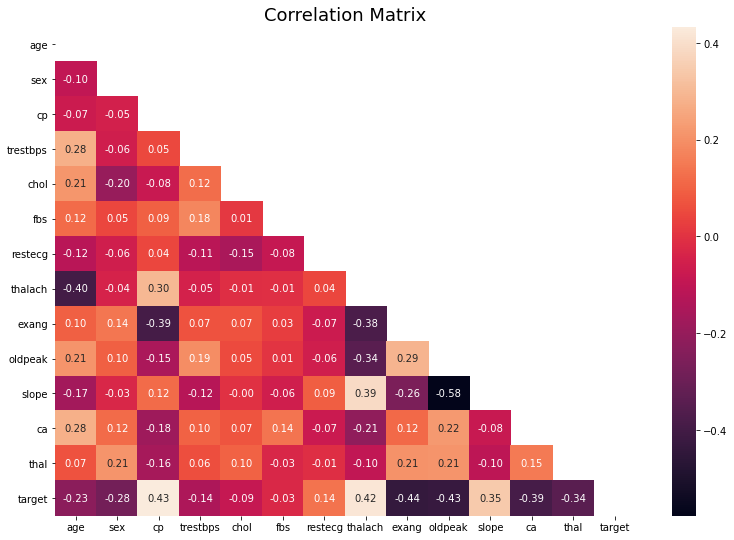

In [82]:
plt.figure(figsize=(13,9))
corr = df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.2f', mask=matrix)
plt.title("Correlation Matrix", fontdict=dict(fontsize=18));

# -0.44 correlation figure for Exercise angina vs Heart disease (target)

## 5. Modelling

1. Model Comparisons
2. Hyperparameter Tuning
3. Confusion Matrix
4. Cross-validation
5. Precision, Recall, F1 Score
6. Classification Report
7. ROC Curve, Area Under Curve (AUC)
8. Feature Importance

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
X = df.drop('target', axis=1)
y = df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
results = {}
models = {'Logistic': LogisticRegression(),
         'Random Forests': RandomForestClassifier(),
         'KNN': KNeighborsClassifier(),
         'Support Vector Machine': SVC()}

In [33]:
import warnings
# Hiding max_iter logistic regression warnings
warnings.filterwarnings('ignore')

In [34]:
np.random.seed(42)
for name, clf in models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test) 
    results[name] = score

### 5.1. Model Comparison

In [38]:
pd.DataFrame(results.values(), 
             results.keys(), 
             columns=['accuracy'])

,accuracy
Logistic,0.885246
Random Forests,0.836066
KNN,0.688525
Support Vector Machine,0.704918


### 5.2. Tuning Hyperparameters

In [83]:
# Lets try KNN

train_scores = []
test_scores = []

neighbors = range(1,21)

# KNN instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Max score on test labels: 75.41%


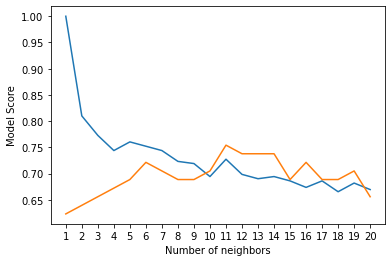

In [92]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score');
print(f'Max score on test labels: {max(test_scores)*100:.2f}%')

In [93]:
# Quite an improvement yet still not reaching the scores of Logistic regression
# and Random Forests

### Hyperparameter tuning with RandomisedSearchCV

1. LogisticRegression()
2. RandomForestClassifier()

In [106]:
# set a grid a hyperparams to test for logistic regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear', 'lbfgs']}

# set a grid for random forests
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3, 5,10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [97]:
np.random.seed(42)
# Setup search for LogReg
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=2)
# fit our tuned model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..................C=0.615848211066026, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.615848211066026, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.615848211066026, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.615848211066026, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.615848211066026, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ................C=0.08858667904100823, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.08858667904100823,

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=2)

In [98]:
# get best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [101]:
rs_log_reg.score(X_test, y_test)
# No improvement as base model also scored 0.885246

0.8852459016393442

#### Setup Search for RandomForests

In [107]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=2)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [108]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [110]:
rs_rf.score(X_train, y_train)
# Improvement! Base model scored 0.836066

0.8553719008264463

### Tuning our model with GridSearchCV

Logistic regression provides the best scores so far, we will try
improve this further with exhaustive hyperparam search

In [111]:
log_reg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear', 'lbfgs']}

In [112]:
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear', 'lbfgs']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [114]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [116]:
gs_log_reg.score(X_test, y_test)
# No improvement

0.8852459016393442

## Evaluating our tuned model
* ROC Curver and AUC score
* Confusion matrics
* Classification report
* Precision
* Recall
* F1-Score

In [117]:
y_preds = gs_log_reg.predict(X_test)

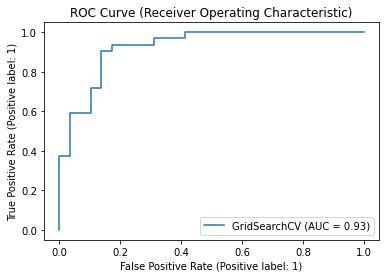

In [129]:
plot_roc_curve(gs_log_reg, X_test, y_test)
plt.title('ROC Curve (Receiver Operating Characteristic)');

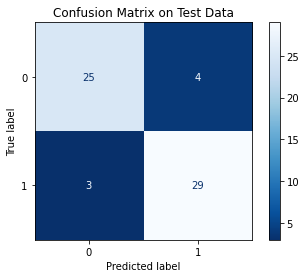

In [130]:
plot_confusion_matrix(gs_log_reg, X_test, y_test, cmap='Blues_r')
plt.title('Confusion Matrix on Test Data');

# False negative of 3 :/

In [131]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Evaluation metrics using Cross Validation

In [132]:
cross_val_score(gs_log_reg, X, y, scoring='')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits


array([0.81967213, 0.90163934, 0.86885246, 0.83333333, 0.75      ])

In [133]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [165]:
def get_cv_score(clf, X, y, scoring):
    scores = cross_val_score(clf, X, y, scoring=scoring).round(4)
    avg = np.mean(scores).round(4)
    print(scores)
    print(f'Mean {scoring}: {avg}')
    return scores.round(4), np.mean(scores)

In [166]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [167]:
# Cross validated accuracy
acc_scores, acc_avg = get_cv_score(clf, X, y, 'accuracy')

[0.8197 0.9016 0.8689 0.8833 0.75  ]
Mean accuracy: 0.8447


In [168]:
# Cross validated precision
prec_scores, prec_avg = get_cv_score(clf, X, y, 'precision')

[0.775  0.8857 0.8571 0.8611 0.725 ]
Mean precision: 0.8208


In [169]:
# Cross validated recall
rec_scores, rec_avg = get_cv_score(clf, X, y, 'recall')

[0.9394 0.9394 0.9091 0.9394 0.8788]
Mean recall: 0.9212


In [170]:
# Cross validated F1-score
f1_scores, f1_avg = get_cv_score(clf, X, y, 'f1')

[0.8493 0.9118 0.8824 0.8986 0.7945]
Mean f1: 0.8673


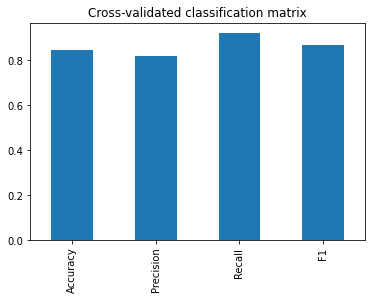

In [171]:
# Visualising CV metrics
cv_metrics = pd.DataFrame({'Accuracy': acc_avg,
                          'Precision': prec_avg,
                          'Recall': rec_avg,
                          'F1': f1_avg},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification matrix',
                     legend=False);

### Feature Importance
Which features contributed most to the outcomes of the model

In [175]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [176]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [180]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [185]:
feature_dict = dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<Figure size 720x576 with 0 Axes>

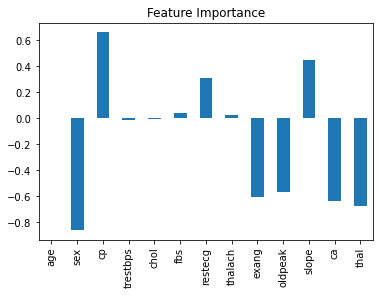

In [194]:
feature_df = pd.DataFrame(feature_dict,
                         index=[0])
plt.figure(figsize = (10,8))
feature_df.T.plot(kind='bar', legend=False,
                 title='Feature Importance');

In [195]:
# As sex increases (ie goes from 0 to 1) the target variable decreases
# (ie goes from 1 to 0), meaning that the likelihood of heart disease 
# falls under the male sex
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [196]:
# From here these results could change the way we collect data, reducing
# the number of features we put into our model, concentrating on those
# that have an impact, and removing those that arent contributing

# A subject matter expert may be able to shed some light on the correlations
# and relationships between the dependent and independant variables

## 6. Experimentation
If we havent hit our evaluation metric yet, we could ask ourselves
* Can we collect more data?
* Can we try a better model? (Catboost, XGboost)
* Can we improve current model (beyond the current)


In [197]:
from xgboost import XGBClassifier

In [198]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
x_y_pred = xgb.predict(X_test)

[22:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [201]:
print(classification_report(y_test, x_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

